**Target:**

- Get the set-up right 
- Set Basic Transforms
- Set Data Loader
- Set Basic Working Code
- Set Basic Training  & Test Loop

**Results:**

- Parameters: 6.3M
- Best Training Accuracy: 99.96
- Best Test Accuracy: 99.34

**Analysis:**

- Extremely Heavy Model for such a problem
- Model is over-fitting, changing our model in the next step

In [ ]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms, datasets
from torchsummary import summary
import matplotlib.pyplot as plt
from models import Net1
from utils import train, test

In [2]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net1().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
            Conv2d-2           [-1, 64, 28, 28]          18,496
         MaxPool2d-3           [-1, 64, 14, 14]               0
            Conv2d-4          [-1, 128, 14, 14]          73,856
            Conv2d-5          [-1, 256, 14, 14]         295,168
         MaxPool2d-6            [-1, 256, 7, 7]               0
            Conv2d-7            [-1, 512, 5, 5]       1,180,160
            Conv2d-8           [-1, 1024, 3, 3]       4,719,616
            Conv2d-9             [-1, 10, 1, 1]          92,170
Total params: 6,379,786
Trainable params: 6,379,786
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 1.51
Params size (MB): 24.34
Estimated Total Size (MB): 25.85
-------------------------------------

In [3]:
torch.manual_seed(1)
batch_size = 128

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,)),
                                ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)


100%|██████████| 9912422/9912422 [00:00<00:00, 325417860.26it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 47337121.46it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 169877708.64it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 7412657.11it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



In [4]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

In [5]:
model = Net1().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
    print(f'Epoch {epoch}')
    train_losses, train_acc = train(model, device, train_loader, optimizer, criterion, train_losses, train_acc)
    test_losses, test_acc = test(model, device, test_loader, criterion, test_losses, test_acc)

Epoch 1


Train: Loss=0.0792 Batch_id=468 Accuracy=87.56: 100%|██████████| 469/469 [00:22<00:00, 21.08it/s]


Test set: Average loss: 0.0646, Accuracy: 9783/10000 (97.83%)

Epoch 2


Train: Loss=0.0234 Batch_id=468 Accuracy=98.28: 100%|██████████| 469/469 [00:22<00:00, 21.07it/s]


Test set: Average loss: 0.0366, Accuracy: 9886/10000 (98.86%)

Epoch 3


Train: Loss=0.0185 Batch_id=468 Accuracy=98.92: 100%|██████████| 469/469 [00:22<00:00, 20.45it/s]


Test set: Average loss: 0.0326, Accuracy: 9898/10000 (98.98%)

Epoch 4


Train: Loss=0.0150 Batch_id=468 Accuracy=99.19: 100%|██████████| 469/469 [00:25<00:00, 18.73it/s]


Test set: Average loss: 0.0388, Accuracy: 9875/10000 (98.75%)

Epoch 5


Train: Loss=0.0083 Batch_id=468 Accuracy=99.33: 100%|██████████| 469/469 [00:22<00:00, 21.00it/s]


Test set: Average loss: 0.0296, Accuracy: 9904/10000 (99.04%)

Epoch 6


Train: Loss=0.0020 Batch_id=468 Accuracy=99.53: 100%|██████████| 469/469 [00:21<00:00, 21.93it/s]


Test set: Average loss: 0.0297, Accuracy: 9915/10000 (99.15%)

Epoch 7


Train: Loss=0.0118 Batch_id=468 Accuracy=99.57: 100%|██████████| 469/469 [00:21<00:00, 22.23it/s]


Test set: Average loss: 0.0325, Accuracy: 9914/10000 (99.14%)

Epoch 8


Train: Loss=0.0030 Batch_id=468 Accuracy=99.68: 100%|██████████| 469/469 [00:21<00:00, 21.79it/s]


Test set: Average loss: 0.0322, Accuracy: 9901/10000 (99.01%)

Epoch 9


Train: Loss=0.0022 Batch_id=468 Accuracy=99.73: 100%|██████████| 469/469 [00:21<00:00, 22.30it/s]


Test set: Average loss: 0.0287, Accuracy: 9922/10000 (99.22%)

Epoch 10


Train: Loss=0.0002 Batch_id=468 Accuracy=99.81: 100%|██████████| 469/469 [00:21<00:00, 22.12it/s]


Test set: Average loss: 0.0345, Accuracy: 9914/10000 (99.14%)

Epoch 11


Train: Loss=0.0001 Batch_id=468 Accuracy=99.85: 100%|██████████| 469/469 [00:21<00:00, 21.99it/s]


Test set: Average loss: 0.0314, Accuracy: 9934/10000 (99.34%)

Epoch 12


Train: Loss=0.0006 Batch_id=468 Accuracy=99.87: 100%|██████████| 469/469 [00:22<00:00, 21.26it/s]


Test set: Average loss: 0.0313, Accuracy: 9922/10000 (99.22%)

Epoch 13


Train: Loss=0.0001 Batch_id=468 Accuracy=99.92: 100%|██████████| 469/469 [00:21<00:00, 22.07it/s]


Test set: Average loss: 0.0375, Accuracy: 9916/10000 (99.16%)

Epoch 14


Train: Loss=0.0001 Batch_id=468 Accuracy=99.94: 100%|██████████| 469/469 [00:21<00:00, 22.11it/s]


Test set: Average loss: 0.0342, Accuracy: 9918/10000 (99.18%)

Epoch 15


Train: Loss=0.0002 Batch_id=468 Accuracy=99.96: 100%|██████████| 469/469 [00:21<00:00, 21.95it/s]


Test set: Average loss: 0.0317, Accuracy: 9923/10000 (99.23%)



Text(0.5, 1.0, 'Test Accuracy')

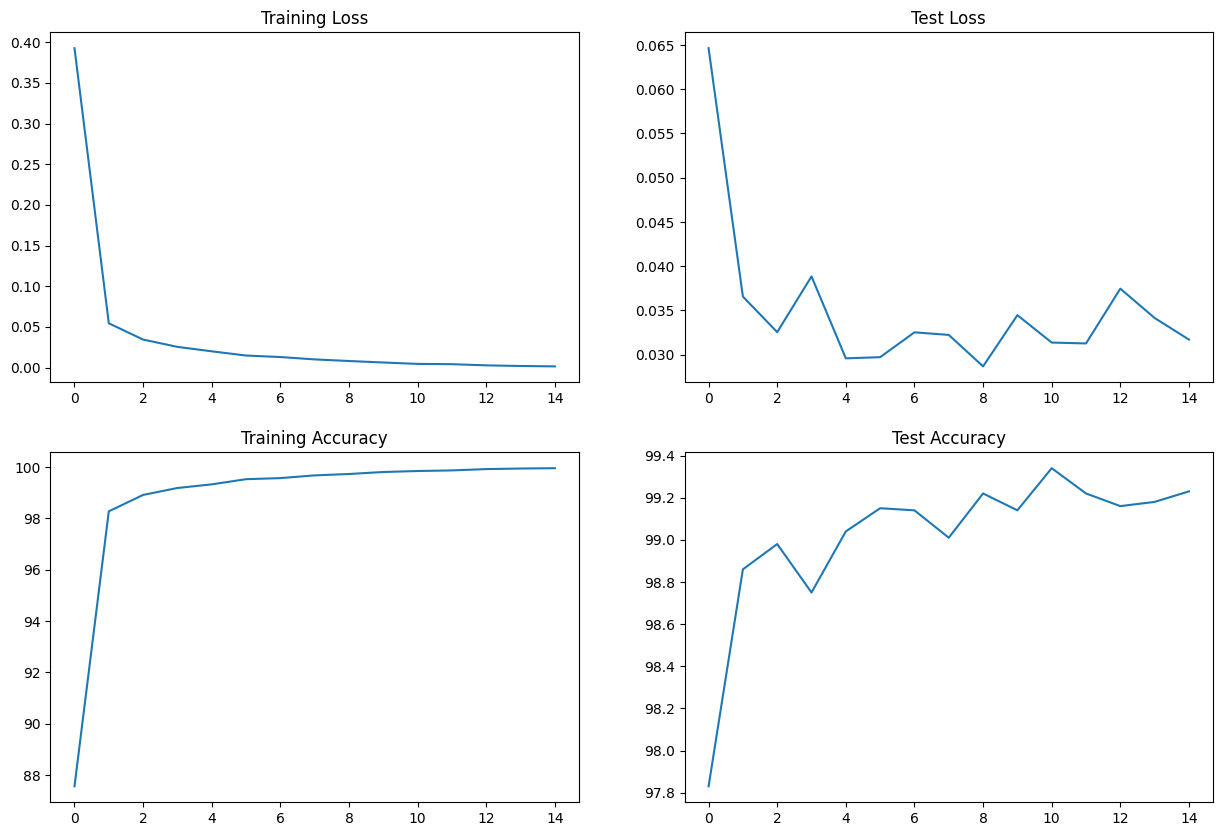

In [7]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

In [9]:
print("best train accuracy : ", max(train_acc))
print("best test accuracy : ", max(test_acc))

best train accuracy :  99.95666666666666
best test accuracy :  99.34
